In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({'font.size': 20})

In [6]:
data = np.load('../data/stereo/case1/stereo.npy', allow_pickle=True).item()
Kl, Dl, Kr, Dr, R, T, img_size = data['Kl'], data['Dl'], data['Kr'], data['Dr'], data['R'], data['T'], data['img_size']

In [7]:
left_img = cv2.imread('../data/stereo/case1/left14.png')
right_img = cv2.imread('../data/stereo/case1/right14.png')

In [9]:
R1, R2, P1, P2, Q, validRoi1, validRoi2 = cv2.stereoRectify(Kl, Dl, Kr, Dr, img_size, R, T)

In [10]:
xmap1, ymap1 = cv2.initUndistortRectifyMap(Kl, Dl, R1, P1, img_size, cv2.CV_32FC1)
xmap2, ymap2 = cv2.initUndistortRectifyMap(Kr, Dr, R2, P2, img_size, cv2.CV_32FC1)

In [11]:
left_img_rectified = cv2.remap(left_img, xmap1, ymap1, cv2.INTER_LINEAR)
right_img_rectified = cv2.remap(right_img, xmap2, ymap2, cv2.INTER_LINEAR)

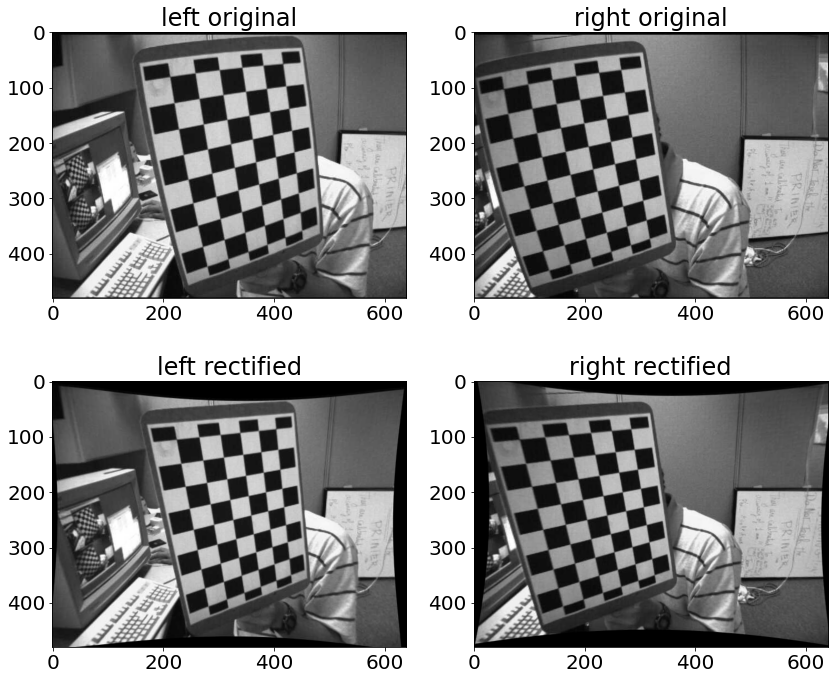

In [12]:
plt.figure(0, figsize=(12,10))
plt.subplot(221)
plt.title('left original')
plt.imshow(left_img, cmap='gray')
plt.subplot(222)
plt.title('right original')
plt.imshow(right_img, cmap='gray')
plt.subplot(223)
plt.title('left rectified')
plt.imshow(left_img_rectified, cmap='gray')
plt.subplot(224)
plt.title('right rectified')
plt.imshow(right_img_rectified, cmap='gray')
plt.tight_layout()
plt.show()